In [50]:
#basics
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from scipy import stats

In [51]:
data = pd.read_csv('sheff_data.csv')
data.tail()

,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours)
1673,2022,6,20.4,10.8,0,55.0,31.7
1674,2022,7,23.3,14.5,0,23.0,190.6
1675,2022,8,23.9,13.6,0,56.4,233.4
1676,2022,9,18.4,11.1,0,50.0,122.2
1677,2022,10,15.6,9.6,0,124.0,109.9


In [55]:
new_data = data[(data['tmax(degC)'] != '---') & (data['tmin(degC)'] != '---')]

In [59]:
new_data['tmax(degC)'] = new_data['tmax(degC)'].astype(float)
new_data['tmin(degC)'] = new_data['tmin(degC)'].astype(float)

/tmp/ipykernel_12899/2048143392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tmax(degC)'] = new_data['tmax(degC)'].astype(float)
/tmp/ipykernel_12899/2048143392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tmin(degC)'] = new_data['tmin(degC)'].astype(float)


In [62]:
new_data['avgtemp(degC)'] = new_data[['tmax(degC)','tmin(degC)']].mean(axis=1)

/tmp/ipykernel_12899/3038493061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['avgtemp(degC)'] = new_data[['tmax(degC)','tmin(degC)']].mean(axis=1)


In [63]:
new_data

,yyyy,mm,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours),avgtemp(degC)
0,1883,1,6.3,1.7,6,122.1,---,4.00
1,1883,2,8.0,2.8,2,69.8,---,5.40
2,1883,3,4.8,-1.6,23,29.6,---,1.60
3,1883,4,12.2,3.8,2,74.0,---,8.00
4,1883,5,14.7,6.2,0,31.2,---,10.45
...,...,...,...,...,...,...,...,...
1673,2022,6,20.4,10.8,0,55.0,31.7,15.60
1674,2022,7,23.3,14.5,0,23.0,190.6,18.90
1675,2022,8,23.9,13.6,0,56.4,233.4,18.75
1676,2022,9,18.4,11.1,0,50.0,122.2,14.75


In [64]:
test_data = new_data[['yyyy','avgtemp(degC)']]

In [65]:
test_data = test_data.groupby('yyyy').mean()

<AxesSubplot: xlabel='yyyy', ylabel='avgtemp(degC)'>

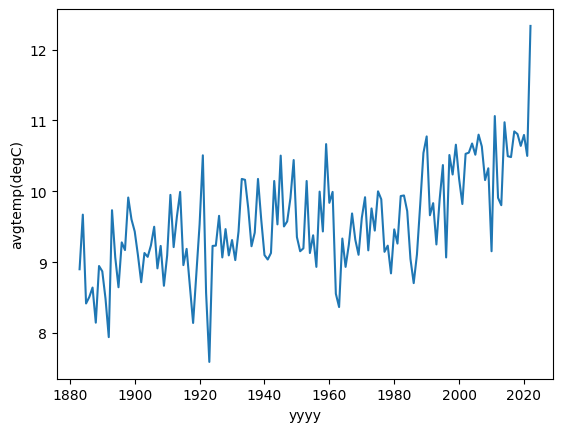

In [67]:
sns.lineplot(test_data['avgtemp(degC)'])